# 인천공항이용자수분석
- https://kosis.kr/search/search.do
- 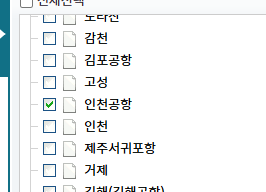

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm

Text(0.2, 0.4, '한글')

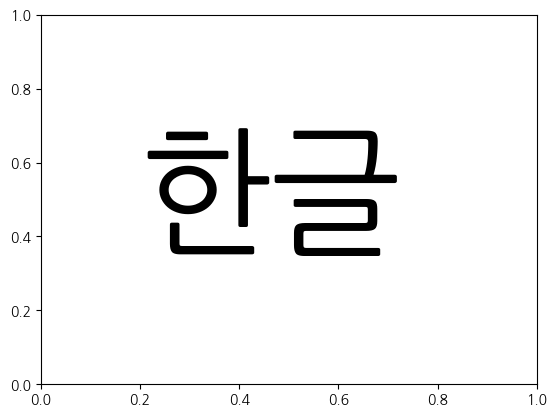

In [2]:
# 윈도우용 폰트 경로 설정
path = "C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.2,0.4,'한글',size=100)

In [3]:
# csv 파일 임포트
file_path = "./ref/출입국항구내외국인성별국제이동연간__20250305.csv"
ori = pd.read_csv(file_path, encoding = "EUC-KR")
ori.head()

,출입국항별,내외국인별,성별,시점,항목,데이터
0,인천공항,내국인,남자,2001,입국자,70444
1,인천공항,내국인,남자,2001,출국자,96551
2,인천공항,내국인,남자,2002,입국자,101032
3,인천공항,내국인,남자,2002,출국자,124319
4,인천공항,내국인,남자,2003,입국자,102093


In [4]:
ex1_data = ori.copy()
ex1_data.columns = ["airport","type1","gender","year","type2","value"]
# ex1_data.rename(columns={"",""})
ex1_data

,airport,type1,gender,year,type2,value
0,인천공항,내국인,남자,2001,입국자,70444
1,인천공항,내국인,남자,2001,출국자,96551
2,인천공항,내국인,남자,2002,입국자,101032
3,인천공항,내국인,남자,2002,출국자,124319
4,인천공항,내국인,남자,2003,입국자,102093
...,...,...,...,...,...,...
179,인천공항,외국인,여자,2021,출국자,112458
180,인천공항,외국인,여자,2022,입국자,172332
181,인천공항,외국인,여자,2022,출국자,106797
182,인천공항,외국인,여자,2023,입국자,181388


In [5]:
# 필터 제작
filter1 = ex1_data['type1']=='외국인'
ex2_data = ex1_data[filter1].copy()

In [6]:
ex1_data = ex1_data.groupby('year')['value'].sum().reset_index(name='total')
ex1_data

,year,total
0,2001,521210
1,2002,697631
2,2003,747272
3,2004,769912
4,2005,991717
5,2006,996275
6,2007,1012415
7,2008,1080247
8,2009,1009778
9,2010,1019086


In [7]:
filter2 = ex2_data['type2']=="입국자"
ex2_filtered = ex2_data[filter2]
filter3 = ex2_data['type2']=='출국자'
ex3_filtered = ex2_data[filter3]
ex2_data = ex2_filtered.groupby('year')['value'].sum().reset_index(name="total")
ex3_data = ex3_filtered.groupby('year')['value'].sum().reset_index(name="total")

<Axes: title={'center': '2021~2023 인천공항 입국 외국인 차트'}>

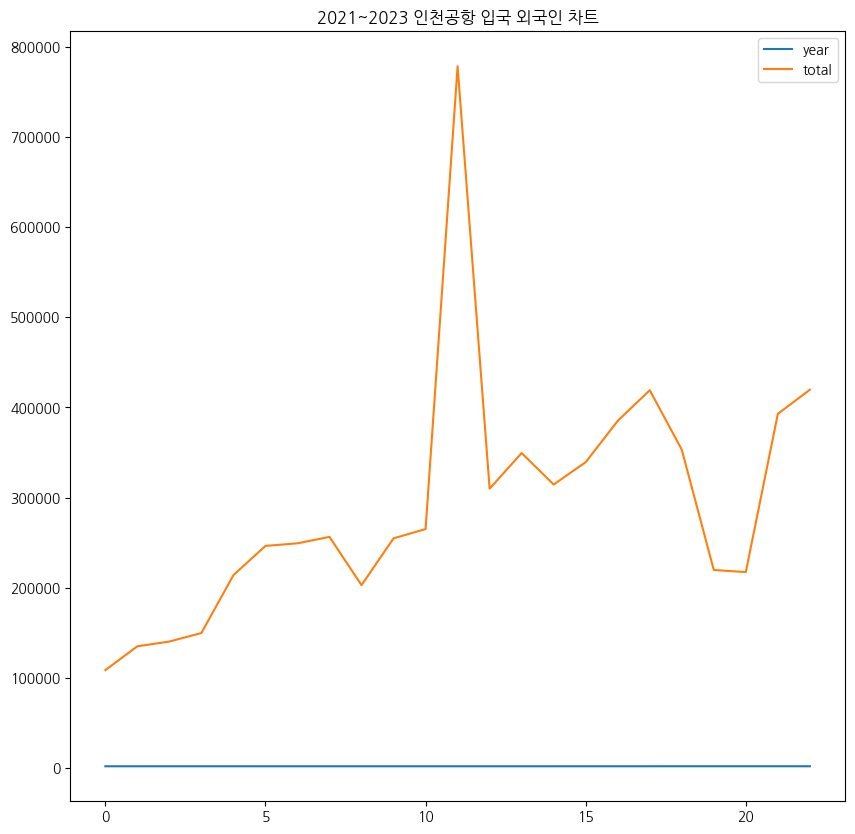

In [8]:
ex2_data.plot(figsize=(10,10),title="2021~2023 인천공항 입국 외국인 차트")

<Axes: title={'center': '2021~2023 인천공항 출국 외국인 차트'}>

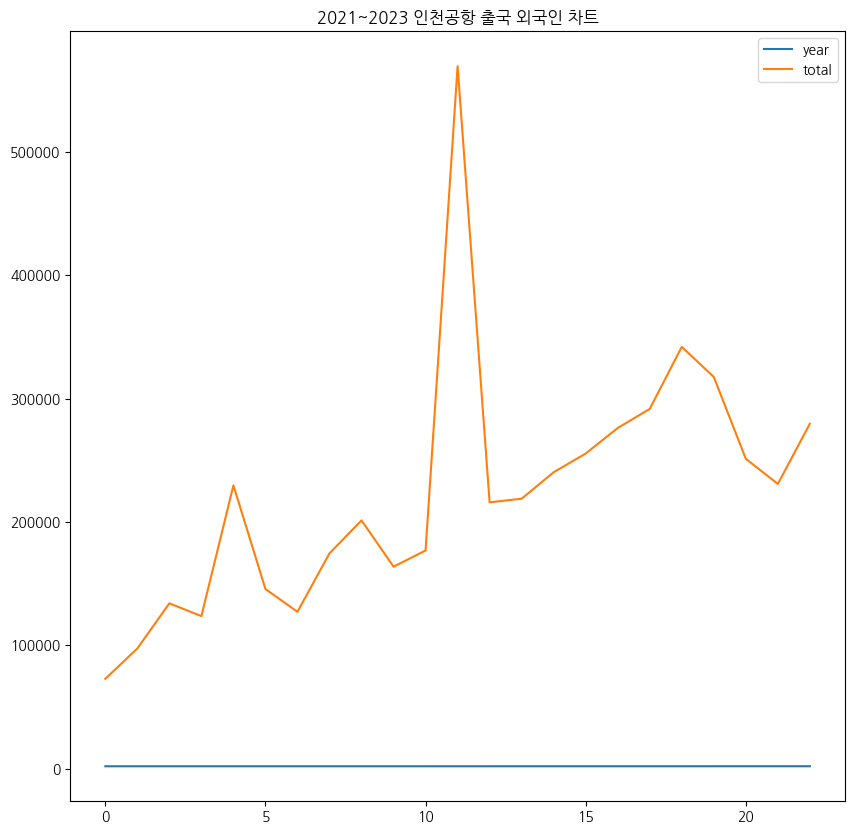

In [9]:
ex3_data.plot(figsize=(10,10),title="2021~2023 인천공항 출국 외국인 차트")

In [10]:
#!pip install prophet
#!pip install --upgrade plotly
#!pip install tqdm
#!pip install --upgrade jupyter ipywidgets

In [11]:
from prophet import Prophet
#from .autonotebook import tqdm as notebook_tqdm

In [12]:
# 페이스북에서는 time(year)을 ds, value 는 y를 사용하므로 전처리 해준다.
ex4_data = ex1_data.copy()
ex4_data['year'] = pd.to_datetime(ex4_data['year'], format="%Y")
ex4_data = ex4_data.rename(columns={'year':'ds','total':'y'})
ex4_data

,ds,y
0,2001-01-01,521210
1,2002-01-01,697631
2,2003-01-01,747272
3,2004-01-01,769912
4,2005-01-01,991717
5,2006-01-01,996275
6,2007-01-01,1012415
7,2008-01-01,1080247
8,2009-01-01,1009778
9,2010-01-01,1019086


In [13]:
m = Prophet()
m.fit(ex4_data)

13:32:06 - cmdstanpy - INFO - Chain [1] start processing
13:32:06 - cmdstanpy - INFO - Chain [1] done processing


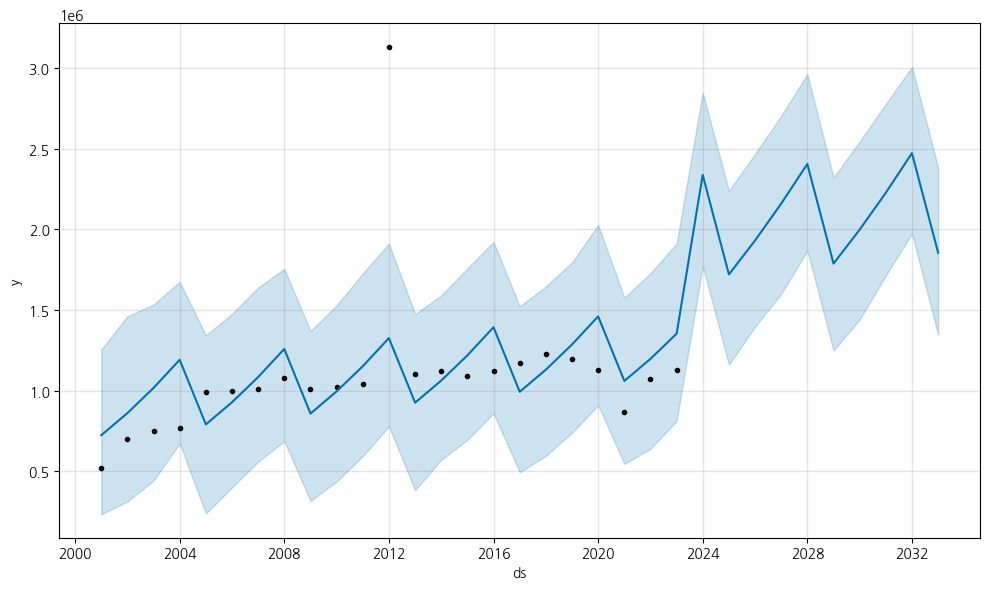

<Figure size 1000x1500 with 0 Axes>

In [14]:
future = m.make_future_dataframe(periods=10, freq='YE') # 10년 후까지의 데이터 예측
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.savefig("./chart/인청공항예측.png")
plt.figure(figsize=(10,15))
plt.show()

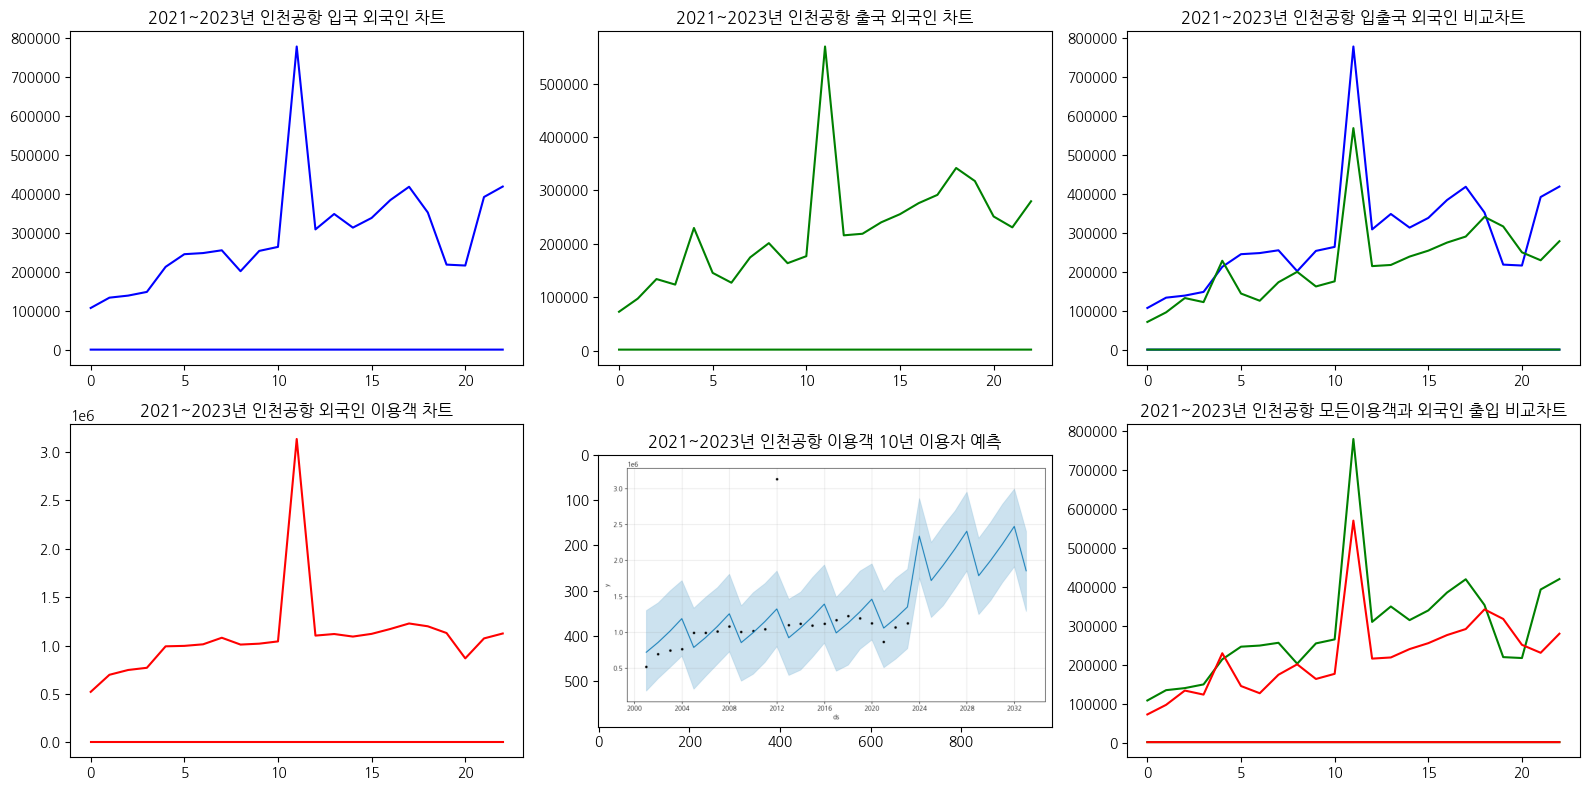

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# 이미지 불러오기
img = mpimg.imread("./chart/예측.png")

fig , axs = plt.subplots(2,3,figsize=(16,8)) # 2 x 2 서브플롯 생성

axs[0,0].plot(ex2_data,color="b")
axs[0,1].plot(ex3_data,color="g") 
axs[0,2].plot(ex2_data,color="b") 
axs[0,2].plot(ex3_data,color="g") 
axs[1,0].plot(ex1_data,color="r") 
axs[1,1].plot(ex1_data,color="b") 
axs[1,2].plot(ex2_data,color="g") 
axs[1,2].plot(ex3_data,color="r") 
axs[0,0].set_title("2021~2023년 인천공항 입국 외국인 차트")
axs[0,1].set_title("2021~2023년 인천공항 출국 외국인 차트")
axs[0,2].set_title("2021~2023년 인천공항 입출국 외국인 비교차트")
axs[1,0].set_title("2021~2023년 인천공항 외국인 이용객 차트")
axs[1,1].set_title("2021~2023년 인천공항 이용객 10년 이용자 예측")
axs[1,2].set_title("2021~2023년 인천공항 모든이용객과 외국인 출입 비교차트")

axins = fig.add_axes(axs[1,1])
axins.imshow(img)
plt.tight_layout()
plt.show()

# 인사이트
1. 입국 및 출국 외국인 추이 분석
- 입출국 모두 특정 시기에 급격한 증가가 보임
- 코로나19 팬데믹 이후 국제선 운항 재개, 방역 규제 완화, 국제 행사 및 이벤트(예: 월드컵, 올림픽, 글로벌 컨퍼런스 등) 등의 영향을 받았을 가능성이 큼
- 이후 다소 감소했지만, 전반적으로 증가세 유지
  
2. 전체 외국인 이용객 수 변화
- 특정 시기에 가장 높게 기록 → 2022년 중순~하반기
- 이후 감소 후 점진적으로 회복세
- 전반적으로 외국인 이용객 수가 다시 늘어나는 추세이므로, 관광업 및 항공업 회복에 긍정적인 신호

3. 전체 이용객 vs 외국인 출입국 비교
- 외국인 출입국과 전체 이용객이 비슷한 패턴을 보임
- 전체 이용객의 증가 속도가 외국인 출입국보다 더 가파른 시점이 있어, 이는 내국인의 해외여행 수요 증가도 반영된 것으로 보임

5. 10년 이용객 예측
- 향후 10년간 이용객 증가 예상, 다만 변동성 존재
- 예측 신뢰 구간에서 상단으로 갈수록 증가세가 가파름 → 국제 교류 증가 및 항공편 확대 예상
### 시사점 및 결론
- 국제선 회복세 지속: 외국인 입출국 수요가 증가하고 있어 항공업 및 관광업의 지속적인 회복 예상
- 특정 기간 피크 분석 필요: 특정 시기에 급격한 증가 원인을 분석해 향후 대비 가능
- 장기적으로 증가세: 10년 예측을 보면 공항 이용객이 지속 증가할 것으로 보이며, 인프라 확충 및 정책적 지원 필요